In [10]:
import datetime
import pandas as pd
import numpy as np
from btyd import BetaGeoModel
import pickle

RFM_PATH = 'data\\rfm.parquet.gzip'
MODEL_PATH = "model\\rfm.model.pkl"

In [11]:
rfm = pd.read_parquet(RFM_PATH)

In [12]:
model = pickle.load(open(MODEL_PATH, "rb"))

In [13]:
def conditional_probability_alive_matrix(
    model, data, max_frequency=None, max_recency=None
):

    max_frequency = max_frequency or int(data["frequency"].max())
    max_recency = max_recency or int(data["T"].max())

    return np.fromfunction(
        model.conditional_probability_alive,
        (max_frequency + 1, max_recency + 1),
        T=max_recency,
    ).T

In [14]:
def plot_probability_alive_matrix(
    model,
    conditional_probability_alive,
    max_frequency=None,
    max_recency=None,
    title="Probability Customer is Alive,\nby Frequency and Recency of a Customer",
    xlabel="Customer's Historical Frequency",
    ylabel="Customer's Recency",
    **kwargs
):

    from matplotlib import pyplot as plt

    z = conditional_probability_alive

    interpolation = kwargs.pop("interpolation", "none")

    ax = plt.subplot(111)
    pcm = ax.imshow(z, interpolation=interpolation, **kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    forceAspect(ax)

    plt.colorbar(pcm, ax=ax)

    return ax


def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent = im[0].get_extent()
    ax.set_aspect(abs((extent[1] - extent[0]) / (extent[3] - extent[2])) / aspect)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

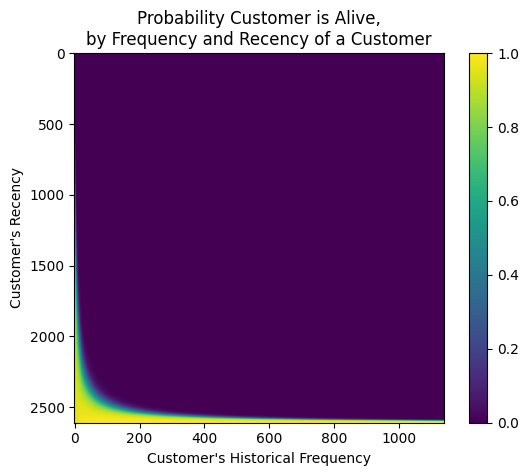

In [15]:
conditional_probability_alive = conditional_probability_alive_matrix(model, rfm)
plot_probability_alive_matrix(model, conditional_probability_alive)